Given Specific learning problem ,the target function and training examples are dictated by the problem.However , the learning algorithm and the hypothesis set are not and are referred to as learning model. 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [122]:
def CLS_data():
    """create_linear_seprable_data : CLSdata"""
    l=np.random.rand(1,2)*10
    p=[]
    n=[]
    while(len(p)<20 or len(n)<20):
        temp = np.random.rand(2,1)*20 - 10
        s = np.sign(np.dot(l,temp))
        #print(s)
        if(s==1):
            p.append(temp)
        elif(s==-1):
            n.append(temp)
    p=np.array(p)
    p=p.reshape((p.shape[0],p.shape[1]))
    n=np.array(n)
    n=n.reshape((n.shape[0],n.shape[1]))
    return  p,n,l
            

In [218]:
def plot(df,w):
    w=w.flatten()
    x=[]
    y=[]
    for row in df:
        x.append(row[0])
        y.append(row[1])
    xt=np.linspace(min(x),max(x))
    #print("w : {} , x : {}".format(w.shape,xt))
    yt=-w[0]*xt/w[1]
    plt.plot(x,y , 'pb')
    plt.plot(xt,yt,'y')
    plt.show()

In [127]:
p,n,w = CLS_data()
df = np.vstack([p,n])

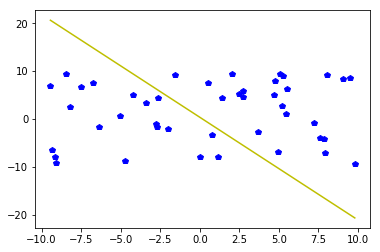

In [128]:
plot(df,w)

In [169]:
augment(df)

0 [3.7317379 5.5194737]
1 [ 8.85505864 -3.07239562]
2 [3.46147969 6.15321785]
3 [-0.54776898 10.11385939]
4 [5.78172703 8.92544205]
5 [ 5.96732069 -5.85110278]
6 [8.20132211 0.17580062]
7 [ 3.00691634 10.38478388]
8 [ 8.61170938 -3.02892957]
9 [ 4.66244994 -1.77395923]
10 [6.50976815 7.36304831]
11 [ 8.93223859 -6.00783979]
12 [6.22390294 3.81476703]
13 [10.51470217  9.57712065]
14 [6.45992452 2.03430925]
15 [3.76200915 6.86440545]
16 [2.40208431 5.4083456 ]
17 [ 6.04196075 10.40067286]
18 [1.52170235 8.60734657]
19 [ 9.05335948 10.26777641]
20 [10.04388543  9.409455  ]
21 [5.68740449 5.98914434]
22 [10.80096136 -8.2753185 ]
23 [6.27508818 9.98626396]
24 [-4.0163901   1.60870611]
25 [ 0.99806789 -6.90093301]
26 [-1.65634864  5.43910583]
27 [-1.03542996 -1.17130193]
28 [-1.70849865 -0.63297006]
29 [-6.51975155  7.69740728]
30 [-8.35326715 -5.47742232]
31 [-3.73650176 -7.80685304]
32 [ 1.75666764 -2.42426255]
33 [-8.10150372 -8.17846047]
34 [-3.2461166   6.08639934]
35 [ 2.16022807 -6.82

array([[ 4.7317379 ,  6.5194737 ],
       [ 9.85505864, -2.07239562],
       [ 4.46147969,  7.15321785],
       [ 0.45223102, 11.11385939],
       [ 6.78172703,  9.92544205],
       [ 6.96732069, -4.85110278],
       [ 9.20132211,  1.17580062],
       [ 4.00691634, 11.38478388],
       [ 9.61170938, -2.02892957],
       [ 5.66244994, -0.77395923],
       [ 7.50976815,  8.36304831],
       [ 9.93223859, -5.00783979],
       [ 7.22390294,  4.81476703],
       [11.51470217, 10.57712065],
       [ 7.45992452,  3.03430925],
       [ 4.76200915,  7.86440545],
       [ 3.40208431,  6.4083456 ],
       [ 7.04196075, 11.40067286],
       [ 2.52170235,  9.60734657],
       [10.05335948, 11.26777641],
       [11.04388543, 10.409455  ],
       [ 6.68740449,  6.98914434],
       [11.80096136, -7.2753185 ],
       [ 7.27508818, 10.98626396],
       [-3.0163901 ,  2.60870611],
       [ 1.99806789, -5.90093301],
       [-0.65634864,  6.43910583],
       [-0.03542996, -0.17130193],
       [-0.70849865,

In [167]:
def augment(x):
    df=np.array()
    for i,r in enumerate(x):
        print(i,r)
        x[i] = np.array([1]+list(np.array(r)))
    return x

In [213]:
#PLA : Perceptron Learning Algorithm
def initialize(x,y):
    w=np.ones(x.shape[1])#2,1
    return w
def choose_misclassified(x,y,w):
    for index , row in enumerate(x):
        #print(np.sign(y[index]*np.dot(w.T,row)))
        if np.sign(y[index]*np.dot(w,row)) == -1:
            return row,y[index]
    return None
    
def PLA(x,y,max_itter=10000):
    w=initialize(x,y)
    t=choose_misclassified(x,y,w)
    print(t)
    count=0
    while(t!=None):
        if(count>max_itter):
            print("reach maximum number of itteration")
            return w
        #print("t : {} , t0*t1 : {}".format(t,t[1]*t[0]))
        #print("w : {}".format(w))
        w+=t[1]*t[0]
        #print("count : {} , w : {}".format(count,w))
        t=choose_misclassified(x,y,w)
        count+=1
    print("number of step = {}".format(count))
    return w

In [188]:
w=PLA(df,y)

(array([-0.65634864,  6.43910583]), -1.0)
count : 0 , w : [ 1.65634864 -5.43910583]
count : 1 , w : [6.38808654 1.08036787]
count : 2 , w : [4.39001865 6.98130087]
count : 3 , w : [11.35733934  2.13019809]
count : 4 , w : [9.35927145 8.0311311 ]
count : 5 , w : [10.0156201   1.59202527]
count : 6 , w : [8.01755221 7.49295827]
count : 7 , w : [8.67390085 1.05385244]
count : 8 , w : [6.67583296 6.95478545]
count : 9 , w : [7.3321816  0.51567961]
count : 10 , w : [5.33411371 6.41661262]
count : 11 , w : [8.35050381 3.80790651]
count : 12 , w : [ 9.00685245 -2.63119932]
count : 13 , w : [9.45908347 8.48266007]
count : 14 , w : [10.11543212  2.04355424]
count : 15 , w : [8.11736423 7.94448724]
count : 16 , w : [8.77371287 1.50538141]
count : 17 , w : [6.77564498 7.40631442]
count : 18 , w : [7.43199362 0.96720858]
count : 19 , w : [5.43392573 6.86814159]
count : 20 , w : [8.45031583 4.25943548]
count : 21 , w : [ 9.10666447 -2.17967035]
count : 22 , w : [9.55889549 8.93418904]
count : 23 , 

count : 543 , w : [8.90814641 0.68939822]
count : 544 , w : [6.91007852 6.59033123]
count : 545 , w : [7.56642716 0.15122539]
count : 546 , w : [5.56835927 6.0521584 ]
count : 547 , w : [ 6.22470791 -0.38694743]
count : 548 , w : [ 6.67693893 10.72691196]
count : 549 , w : [13.64425963  5.87580918]
count : 550 , w : [14.30060827 -0.56329665]
count : 551 , w : [12.30254038  5.33763635]
count : 552 , w : [12.95888902 -1.10146948]
count : 553 , w : [13.41112004 10.01238991]
count : 554 , w : [14.06746868  3.57328408]
count : 555 , w : [12.06940079  9.47421708]
count : 556 , w : [12.72574943  3.03511125]
count : 557 , w : [10.72768154  8.93604426]
count : 558 , w : [11.38403018  2.49693842]
count : 559 , w : [9.38596229 8.39787143]
count : 560 , w : [10.04231094  1.9587656 ]
count : 561 , w : [8.04424305 7.8596986 ]
count : 562 , w : [8.70059169 1.42059277]
count : 563 , w : [6.7025238  7.32152578]
count : 564 , w : [7.35887244 0.88241994]
count : 565 , w : [5.36080455 6.78335295]
count : 

count : 1090 , w : [7.89168079 6.89443467]
count : 1091 , w : [8.54802944 0.45532884]
count : 1092 , w : [6.54996155 6.35626184]
count : 1093 , w : [ 7.20631019 -0.08284399]
count : 1094 , w : [5.2082423  5.81808902]
count : 1095 , w : [ 5.86459094 -0.62101681]
count : 1096 , w : [ 6.31682196 10.49284258]
count : 1097 , w : [13.28414265  5.6417398 ]
count : 1098 , w : [13.9404913  -0.79736604]
count : 1099 , w : [14.39272232 10.31649335]
count : 1100 , w : [15.04907096  3.87738752]
count : 1101 , w : [13.05100307  9.77832053]
count : 1102 , w : [13.70735171  3.33921469]
count : 1103 , w : [11.70928382  9.2401477 ]
count : 1104 , w : [12.36563246  2.80104187]
count : 1105 , w : [10.36756457  8.70197487]
count : 1106 , w : [11.02391321  2.26286904]
count : 1107 , w : [9.02584532 8.16380205]
count : 1108 , w : [9.68219396 1.72469621]
count : 1109 , w : [7.68412608 7.62562922]
count : 1110 , w : [8.34047472 1.18652339]
count : 1111 , w : [6.34240683 7.08745639]
count : 1112 , w : [6.998755

count : 1568 , w : [11.70232047  4.09796375]
count : 1569 , w : [12.35866911 -2.34114208]
count : 1570 , w : [12.81090013  8.77271731]
count : 1571 , w : [13.46724877  2.33361148]
count : 1572 , w : [11.46918088  8.23454448]
count : 1573 , w : [12.12552952  1.79543865]
count : 1574 , w : [10.12746163  7.69637166]
count : 1575 , w : [10.78381027  1.25726582]
count : 1576 , w : [8.78574238 7.15819883]
count : 1577 , w : [9.44209103 0.719093  ]
count : 1578 , w : [7.44402314 6.620026  ]
count : 1579 , w : [8.10037178 0.18092017]
count : 1580 , w : [6.10230389 6.08185318]
count : 1581 , w : [ 6.75865253 -0.35725266]
count : 1582 , w : [ 7.21088355 10.75660673]
count : 1583 , w : [14.17820424  5.90550395]
count : 1584 , w : [14.83455288 -0.53360188]
count : 1585 , w : [12.836485    5.36733113]
count : 1586 , w : [13.49283364 -1.07177471]
count : 1587 , w : [13.94506466 10.04208468]
count : 1588 , w : [14.6014133   3.60297885]
count : 1589 , w : [12.60334541  9.50391186]
count : 1590 , w : [

count : 2047 , w : [11.15485079  3.37202611]
count : 2048 , w : [9.1567829  9.27295912]
count : 2049 , w : [9.81313154 2.83385328]
count : 2050 , w : [7.81506365 8.73478629]
count : 2051 , w : [8.47141229 2.29568046]
count : 2052 , w : [6.4733444  8.19661346]
count : 2053 , w : [9.4897345  5.58790736]
count : 2054 , w : [10.14608314 -0.85119848]
count : 2055 , w : [10.59831417 10.26266091]
count : 2056 , w : [11.25466281  3.82355508]
count : 2057 , w : [11.91101145 -2.61555075]
count : 2058 , w : [12.36324247  8.49830864]
count : 2059 , w : [13.01959111  2.05920281]
count : 2060 , w : [11.02152322  7.96013581]
count : 2061 , w : [11.67787186  1.52102998]
count : 2062 , w : [9.67980397 7.42196299]
count : 2063 , w : [10.33615261  0.98285715]
count : 2064 , w : [8.33808472 6.88379016]
count : 2065 , w : [8.99443337 0.44468433]
count : 2066 , w : [6.99636548 6.34561733]
count : 2067 , w : [ 7.65271412 -0.0934885 ]
count : 2068 , w : [5.65464623 5.80744451]
count : 2069 , w : [ 6.31099487 

count : 2522 , w : [ 9.78579724 -1.87938435]
count : 2523 , w : [10.23802826  9.23447504]
count : 2524 , w : [10.8943769   2.79536921]
count : 2525 , w : [8.89630901 8.69630222]
count : 2526 , w : [9.55265765 2.25719639]
count : 2527 , w : [7.55458976 8.15812939]
count : 2528 , w : [8.2109384  1.71902356]
count : 2529 , w : [6.21287051 7.61995656]
count : 2530 , w : [9.22926062 5.01125046]
count : 2531 , w : [ 9.88560926 -1.42785538]
count : 2532 , w : [10.33784028  9.68600401]
count : 2533 , w : [10.99418892  3.24689818]
count : 2534 , w : [8.99612103 9.14783119]
count : 2535 , w : [9.65246967 2.70872536]
count : 2536 , w : [7.65440178 8.60965836]
count : 2537 , w : [8.31075042 2.17055253]
count : 2538 , w : [6.31268253 8.07148554]
count : 2539 , w : [9.32907264 5.46277943]
count : 2540 , w : [ 9.98542128 -0.9763264 ]
count : 2541 , w : [10.4376523  10.13753299]
count : 2542 , w : [11.09400094  3.69842715]
count : 2543 , w : [9.09593305 9.59936016]
count : 2544 , w : [9.75228169 3.160

count : 2974 , w : [8.65332037 5.55439514]
count : 2975 , w : [ 9.30966901 -0.88471069]
count : 2976 , w : [ 9.76190003 10.2291487 ]
count : 2977 , w : [10.41824867  3.79004287]
count : 2978 , w : [11.07459732 -2.64906297]
count : 2979 , w : [11.52682834  8.46479642]
count : 2980 , w : [12.18317698  2.02569059]
count : 2981 , w : [10.18510909  7.9266236 ]
count : 2982 , w : [10.84145773  1.48751776]
count : 2983 , w : [8.84338984 7.38845077]
count : 2984 , w : [9.49973848 0.94934494]
count : 2985 , w : [7.50167059 6.85027794]
count : 2986 , w : [8.15801923 0.41117211]
count : 2987 , w : [6.15995134 6.31210512]
count : 2988 , w : [ 6.81629998 -0.12700072]
count : 2989 , w : [4.8182321  5.77393229]
count : 2990 , w : [7.8346222  3.16522618]
count : 2991 , w : [ 8.49097084 -3.27387965]
count : 2992 , w : [8.94320186 7.83997974]
count : 2993 , w : [9.5995505  1.40087391]
count : 2994 , w : [7.60148261 7.30180691]
count : 2995 , w : [8.25783125 0.86270108]
count : 2996 , w : [6.25976336 6.7

count : 3459 , w : [10.49072639 -0.47166579]
count : 3460 , w : [10.94295741 10.6421936 ]
count : 3461 , w : [11.59930605  4.20308776]
count : 3462 , w : [12.2556547  -2.23601807]
count : 3463 , w : [12.70788572  8.87784132]
count : 3464 , w : [13.36423436  2.43873549]
count : 3465 , w : [11.36616647  8.33966849]
count : 3466 , w : [12.02251511  1.90056266]
count : 3467 , w : [10.02444722  7.80149567]
count : 3468 , w : [10.68079586  1.36238984]
count : 3469 , w : [8.68272797 7.26332284]
count : 3470 , w : [9.33907661 0.82421701]
count : 3471 , w : [7.34100872 6.72515002]
count : 3472 , w : [7.99735737 0.28604418]
count : 3473 , w : [5.99928948 6.18697719]
count : 3474 , w : [ 6.65563812 -0.25212864]
count : 3475 , w : [4.65757023 5.64880436]
count : 3476 , w : [7.67396033 3.04009825]
count : 3477 , w : [ 8.33030897 -3.39900758]
count : 3478 , w : [8.78253999 7.71485181]
count : 3479 , w : [9.43888863 1.27574598]
count : 3480 , w : [7.44082074 7.17667899]
count : 3481 , w : [8.09716939

count : 3943 , w : [7.18468751 8.64546426]
count : 3944 , w : [10.20107761  6.03675815]
count : 3945 , w : [10.85742625 -0.40234768]
count : 3946 , w : [8.85935836 5.49858533]
count : 3947 , w : [ 9.515707   -0.94052051]
count : 3948 , w : [ 9.96793803 10.17333888]
count : 3949 , w : [10.62428667  3.73423305]
count : 3950 , w : [11.28063531 -2.70487278]
count : 3951 , w : [11.73286633  8.40898661]
count : 3952 , w : [12.38921497  1.96988078]
count : 3953 , w : [10.39114708  7.87081378]
count : 3954 , w : [11.04749572  1.43170795]
count : 3955 , w : [9.04942783 7.33264096]
count : 3956 , w : [9.70577647 0.89353512]
count : 3957 , w : [7.70770858 6.79446813]
count : 3958 , w : [8.36405723 0.3553623 ]
count : 3959 , w : [6.36598934 6.2562953 ]
count : 3960 , w : [ 7.02233798 -0.18281053]
count : 3961 , w : [5.02427009 5.71812248]
count : 3962 , w : [ 5.68061873 -0.72098336]
count : 3963 , w : [ 6.13284975 10.39287603]
count : 3964 , w : [13.10017044  5.54177325]
count : 3965 , w : [13.756

count : 4428 , w : [10.07681699  3.00829541]
count : 4429 , w : [8.0787491  8.90922842]
count : 4430 , w : [8.73509774 2.47012259]
count : 4431 , w : [6.73702985 8.37105559]
count : 4432 , w : [9.75341995 5.76234948]
count : 4433 , w : [10.40976859 -0.67675635]
count : 4434 , w : [10.86199961 10.43710304]
count : 4435 , w : [11.51834826  3.99799721]
count : 4436 , w : [12.1746969  -2.44110862]
count : 4437 , w : [12.62692792  8.67275077]
count : 4438 , w : [13.28327656  2.23364493]
count : 4439 , w : [11.28520867  8.13457794]
count : 4440 , w : [11.94155731  1.69547211]
count : 4441 , w : [9.94348942 7.59640511]
count : 4442 , w : [10.59983806  1.15729928]
count : 4443 , w : [8.60177017 7.05823229]
count : 4444 , w : [9.25811881 0.61912645]
count : 4445 , w : [7.26005093 6.52005946]
count : 4446 , w : [7.91639957 0.08095363]
count : 4447 , w : [5.91833168 5.98188663]
count : 4448 , w : [ 6.57468032 -0.4572192 ]
count : 4449 , w : [ 7.02691134 10.65664019]
count : 4450 , w : [13.9942320

count : 4910 , w : [6.18956017 7.64511795]
count : 4911 , w : [9.20595027 5.03641184]
count : 4912 , w : [ 9.86229891 -1.40269399]
count : 4913 , w : [10.31452994  9.7111654 ]
count : 4914 , w : [10.97087858  3.27205957]
count : 4915 , w : [8.97281069 9.17299258]
count : 4916 , w : [9.62915933 2.73388674]
count : 4917 , w : [7.63109144 8.63481975]
count : 4918 , w : [8.28744008 2.19571392]
count : 4919 , w : [6.28937219 8.09664692]
count : 4920 , w : [9.30576229 5.48794081]
count : 4921 , w : [ 9.96211093 -0.95116502]
count : 4922 , w : [10.41434196 10.16269437]
count : 4923 , w : [11.0706906   3.72358854]
count : 4924 , w : [9.07262271 9.62452155]
count : 4925 , w : [9.72897135 3.18541571]
count : 4926 , w : [7.73090346 9.08634872]
count : 4927 , w : [10.74729356  6.47764261]
count : 4928 , w : [11.4036422   0.03853678]
count : 4929 , w : [9.40557431 5.93946978]
count : 4930 , w : [10.06192295 -0.49963605]
count : 4931 , w : [10.51415398 10.61422334]
count : 4932 , w : [11.17050262  4

count : 5386 , w : [6.86362677 7.43477049]
count : 5387 , w : [7.51997541 0.99566465]
count : 5388 , w : [5.52190752 6.89659766]
count : 5389 , w : [8.53829762 4.28789155]
count : 5390 , w : [ 9.19464627 -2.15121428]
count : 5391 , w : [9.64687729 8.96264511]
count : 5392 , w : [10.30322593  2.52353928]
count : 5393 , w : [8.30515804 8.42447228]
count : 5394 , w : [8.96150668 1.98536645]
count : 5395 , w : [6.96343879 7.88629946]
count : 5396 , w : [7.61978743 1.44719363]
count : 5397 , w : [5.62171954 7.34812663]
count : 5398 , w : [8.63810964 4.73942052]
count : 5399 , w : [ 9.29445829 -1.69968531]
count : 5400 , w : [9.74668931 9.41417408]
count : 5401 , w : [10.40303795  2.97506825]
count : 5402 , w : [8.40497006 8.87600125]
count : 5403 , w : [9.0613187  2.43689542]
count : 5404 , w : [7.06325081 8.33782843]
count : 5405 , w : [10.07964091  5.72912232]
count : 5406 , w : [10.73598955 -0.70998351]
count : 5407 , w : [11.18822058 10.40387588]
count : 5408 , w : [11.84456922  3.96477

count : 5861 , w : [7.4175104  7.20184037]
count : 5862 , w : [8.07385904 0.76273454]
count : 5863 , w : [6.07579115 6.66366755]
count : 5864 , w : [6.73213979 0.22456171]
count : 5865 , w : [4.73407191 6.12549472]
count : 5866 , w : [7.75046201 3.51678861]
count : 5867 , w : [ 8.40681065 -2.92231722]
count : 5868 , w : [8.85904167 8.19154217]
count : 5869 , w : [9.51539031 1.75243634]
count : 5870 , w : [7.51732242 7.65336934]
count : 5871 , w : [8.17367106 1.21426351]
count : 5872 , w : [6.17560317 7.11519652]
count : 5873 , w : [6.83195181 0.67609068]
count : 5874 , w : [4.83388393 6.57702369]
count : 5875 , w : [7.85027403 3.96831758]
count : 5876 , w : [ 8.50662267 -2.47078825]
count : 5877 , w : [8.95885369 8.64307114]
count : 5878 , w : [9.61520233 2.20396531]
count : 5879 , w : [7.61713444 8.10489831]
count : 5880 , w : [8.27348308 1.66579248]
count : 5881 , w : [6.27541519 7.56672549]
count : 5882 , w : [9.2918053  4.95801938]
count : 5883 , w : [ 9.94815394 -1.48108645]
count

count : 6348 , w : [14.31442668  3.60813632]
count : 6349 , w : [12.31635879  9.50906933]
count : 6350 , w : [12.97270743  3.0699635 ]
count : 6351 , w : [10.97463954  8.9708965 ]
count : 6352 , w : [11.63098818  2.53179067]
count : 6353 , w : [9.63292029 8.43272368]
count : 6354 , w : [10.28926893  1.99361784]
count : 6355 , w : [8.29120104 7.89455085]
count : 6356 , w : [8.94754968 1.45544502]
count : 6357 , w : [6.94948179 7.35637802]
count : 6358 , w : [7.60583044 0.91727219]
count : 6359 , w : [5.60776255 6.8182052 ]
count : 6360 , w : [8.62415265 4.20949909]
count : 6361 , w : [ 9.28050129 -2.22960674]
count : 6362 , w : [9.73273231 8.88425265]
count : 6363 , w : [10.38908095  2.44514681]
count : 6364 , w : [8.39101306 8.34607982]
count : 6365 , w : [9.0473617  1.90697399]
count : 6366 , w : [7.04929381 7.80790699]
count : 6367 , w : [7.70564246 1.36880116]
count : 6368 , w : [5.70757457 7.26973417]
count : 6369 , w : [8.72396467 4.66102806]
count : 6370 , w : [ 9.38031331 -1.778

count : 6837 , w : [12.93222853  2.96741822]
count : 6838 , w : [10.93416064  8.86835123]
count : 6839 , w : [11.59050928  2.42924539]
count : 6840 , w : [9.59244139 8.3301784 ]
count : 6841 , w : [10.24879003  1.89107257]
count : 6842 , w : [8.25072214 7.79200557]
count : 6843 , w : [8.90707078 1.35289974]
count : 6844 , w : [6.90900289 7.25383275]
count : 6845 , w : [7.56535154 0.81472691]
count : 6846 , w : [5.56728365 6.71565992]
count : 6847 , w : [8.58367375 4.10695381]
count : 6848 , w : [ 9.24002239 -2.33215202]
count : 6849 , w : [9.69225341 8.78170737]
count : 6850 , w : [10.34860205  2.34260154]
count : 6851 , w : [8.35053416 8.24353454]
count : 6852 , w : [9.0068828  1.80442871]
count : 6853 , w : [7.00881491 7.70536172]
count : 6854 , w : [7.66516356 1.26625588]
count : 6855 , w : [5.66709567 7.16718889]
count : 6856 , w : [8.68348577 4.55848278]
count : 6857 , w : [ 9.33983441 -1.88062305]
count : 6858 , w : [9.79206543 9.23323634]
count : 6859 , w : [10.44841407  2.79413

count : 7306 , w : [12.69212559  1.961815  ]
count : 7307 , w : [10.6940577   7.86274801]
count : 7308 , w : [11.35040634  1.42364217]
count : 7309 , w : [9.35233845 7.32457518]
count : 7310 , w : [10.00868709  0.88546935]
count : 7311 , w : [8.0106192  6.78640235]
count : 7312 , w : [8.66696784 0.34729652]
count : 7313 , w : [6.66889996 6.24822953]
count : 7314 , w : [ 7.3252486  -0.19087631]
count : 7315 , w : [5.32718071 5.7100567 ]
count : 7316 , w : [ 5.98352935 -0.72904913]
count : 7317 , w : [ 6.43576037 10.38481026]
count : 7318 , w : [13.40308106  5.53370748]
count : 7319 , w : [14.0594297  -0.90539835]
count : 7320 , w : [14.51166073 10.20846104]
count : 7321 , w : [15.16800937  3.7693552 ]
count : 7322 , w : [13.16994148  9.67028821]
count : 7323 , w : [13.82629012  3.23118238]
count : 7324 , w : [11.82822223  9.13211538]
count : 7325 , w : [12.48457087  2.69300955]
count : 7326 , w : [10.48650298  8.59394256]
count : 7327 , w : [11.14285162  2.15483672]
count : 7328 , w : [

count : 7798 , w : [11.39370917  4.24701436]
count : 7799 , w : [12.05005781 -2.19209147]
count : 7800 , w : [12.50228883  8.92176792]
count : 7801 , w : [13.15863747  2.48266209]
count : 7802 , w : [11.16056958  8.38359509]
count : 7803 , w : [11.81691822  1.94448926]
count : 7804 , w : [9.81885033 7.84542227]
count : 7805 , w : [10.47519897  1.40631643]
count : 7806 , w : [8.47713108 7.30724944]
count : 7807 , w : [9.13347973 0.86814361]
count : 7808 , w : [7.13541184 6.76907661]
count : 7809 , w : [7.79176048 0.32997078]
count : 7810 , w : [5.79369259 6.23090379]
count : 7811 , w : [ 6.45004123 -0.20820205]
count : 7812 , w : [4.45197334 5.69273096]
count : 7813 , w : [7.46836344 3.08402485]
count : 7814 , w : [ 8.12471208 -3.35508098]
count : 7815 , w : [8.5769431  7.75877841]
count : 7816 , w : [9.23329175 1.31967258]
count : 7817 , w : [7.23522386 7.22060558]
count : 7818 , w : [7.8915725  0.78149975]
count : 7819 , w : [5.89350461 6.68243276]
count : 7820 , w : [6.54985325 0.243

count : 8283 , w : [ 9.18992715 -0.91917656]
count : 8284 , w : [ 9.64215817 10.19468283]
count : 8285 , w : [10.29850681  3.755577  ]
count : 8286 , w : [10.95485545 -2.68352883]
count : 8287 , w : [11.40708647  8.43033056]
count : 8288 , w : [12.06343511  1.99122472]
count : 8289 , w : [10.06536722  7.89215773]
count : 8290 , w : [10.72171587  1.4530519 ]
count : 8291 , w : [8.72364798 7.3539849 ]
count : 8292 , w : [9.37999662 0.91487907]
count : 8293 , w : [7.38192873 6.81581208]
count : 8294 , w : [8.03827737 0.37670624]
count : 8295 , w : [6.04020948 6.27763925]
count : 8296 , w : [ 6.69655812 -0.16146658]
count : 8297 , w : [4.69849023 5.73946642]
count : 8298 , w : [7.71488033 3.13076031]
count : 8299 , w : [ 8.37122897 -3.30834552]
count : 8300 , w : [8.82346    7.80551387]
count : 8301 , w : [9.47980864 1.36640804]
count : 8302 , w : [7.48174075 7.26734105]
count : 8303 , w : [8.13808939 0.82823521]
count : 8304 , w : [6.1400215  6.72916822]
count : 8305 , w : [6.79637014 0.2

count : 8775 , w : [10.96823276  1.49978736]
count : 8776 , w : [8.97016487 7.40072037]
count : 8777 , w : [9.62651351 0.96161453]
count : 8778 , w : [7.62844562 6.86254754]
count : 8779 , w : [8.28479426 0.42344171]
count : 8780 , w : [6.28672637 6.32437471]
count : 8781 , w : [ 6.94307501 -0.11473112]
count : 8782 , w : [4.94500712 5.78620189]
count : 8783 , w : [7.96139722 3.17749578]
count : 8784 , w : [ 8.61774587 -3.26161005]
count : 8785 , w : [9.06997689 7.85224934]
count : 8786 , w : [9.72632553 1.4131435 ]
count : 8787 , w : [7.72825764 7.31407651]
count : 8788 , w : [8.38460628 0.87497068]
count : 8789 , w : [6.38653839 6.77590368]
count : 8790 , w : [7.04288703 0.33679785]
count : 8791 , w : [5.04481914 6.23773086]
count : 8792 , w : [8.06120925 3.62902475]
count : 8793 , w : [ 8.71755789 -2.81008108]
count : 8794 , w : [9.16978891 8.30377831]
count : 8795 , w : [9.82613755 1.86467247]
count : 8796 , w : [7.82806966 7.76560548]
count : 8797 , w : [8.4844183  1.32649965]
cou

count : 9277 , w : [12.87627591  3.01033624]
count : 9278 , w : [10.87820802  8.91126925]
count : 9279 , w : [11.53455666  2.47216342]
count : 9280 , w : [9.53648877 8.37309642]
count : 9281 , w : [10.19283741  1.93399059]
count : 9282 , w : [8.19476952 7.83492359]
count : 9283 , w : [8.85111816 1.39581776]
count : 9284 , w : [6.85305027 7.29675077]
count : 9285 , w : [7.50939891 0.85764494]
count : 9286 , w : [5.51133102 6.75857794]
count : 9287 , w : [8.52772113 4.14987183]
count : 9288 , w : [ 9.18406977 -2.289234  ]
count : 9289 , w : [9.63630079 8.82462539]
count : 9290 , w : [10.29264943  2.38551956]
count : 9291 , w : [8.29458154 8.28645257]
count : 9292 , w : [8.95093018 1.84734673]
count : 9293 , w : [6.95286229 7.74827974]
count : 9294 , w : [7.60921093 1.30917391]
count : 9295 , w : [5.61114304 7.21010691]
count : 9296 , w : [8.62753315 4.6014008 ]
count : 9297 , w : [ 9.28388179 -1.83770503]
count : 9298 , w : [9.73611281 9.27615436]
count : 9299 , w : [10.39246145  2.83704

count : 9784 , w : [ 9.24340289 -1.94025031]
count : 9785 , w : [9.69563391 9.17360908]
count : 9786 , w : [10.35198255  2.73450325]
count : 9787 , w : [8.35391466 8.63543626]
count : 9788 , w : [9.0102633  2.19633043]
count : 9789 , w : [7.01219541 8.09726343]
count : 9790 , w : [7.66854405 1.6581576 ]
count : 9791 , w : [5.67047616 7.5590906 ]
count : 9792 , w : [8.68686627 4.9503845 ]
count : 9793 , w : [ 9.34321491 -1.48872134]
count : 9794 , w : [9.79544593 9.62513806]
count : 9795 , w : [10.45179457  3.18603222]
count : 9796 , w : [8.45372668 9.08696523]
count : 9797 , w : [9.11007532 2.6478594 ]
count : 9798 , w : [7.11200743 8.5487924 ]
count : 9799 , w : [10.12839754  5.94008629]
count : 9800 , w : [10.78474618 -0.49901954]
count : 9801 , w : [11.2369772  10.61483985]
count : 9802 , w : [11.89332584  4.17573402]
count : 9803 , w : [12.54967448 -2.26337181]
count : 9804 , w : [13.0019055   8.85048758]
count : 9805 , w : [13.65825414  2.41138175]
count : 9806 , w : [11.66018625 

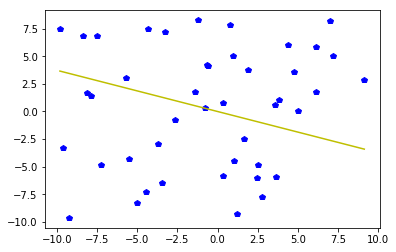

(array([-5.74222381,  3.05216363]), 1.0)
number of step = 3


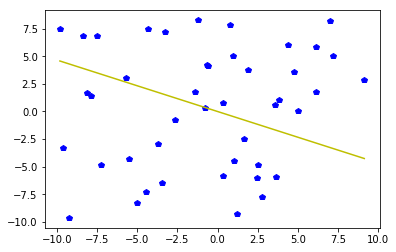

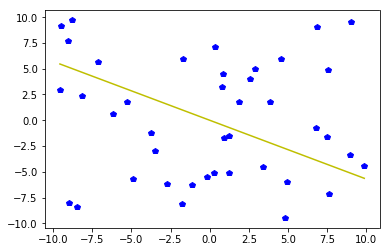

(array([-9.02561455,  7.72895375]), 1.0)
number of step = 17


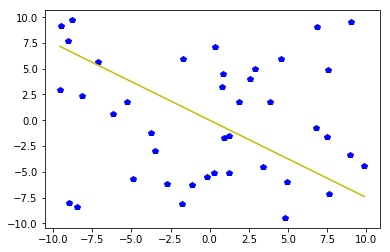

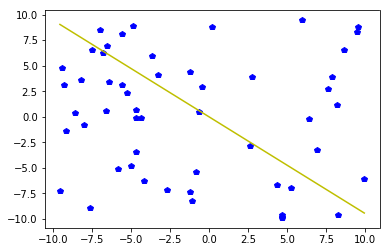

None
number of step = 0


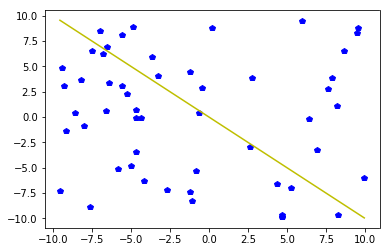

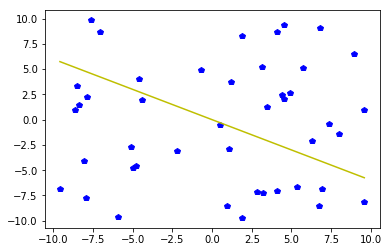

(array([-4.58218601,  4.00994943]), 1.0)
number of step = 14


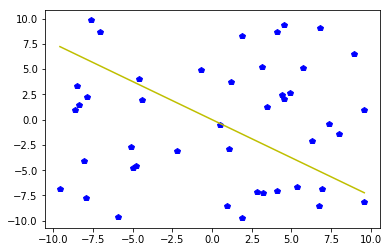

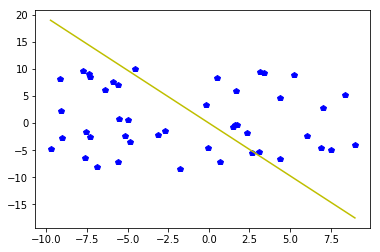

(array([ 4.34782194, -6.56258994]), 1.0)
number of step = 30


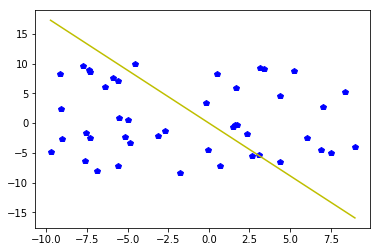

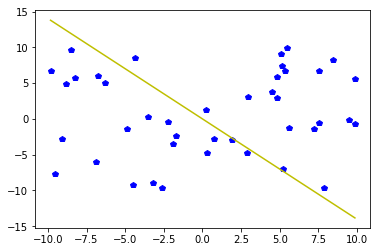

(array([ 5.19597144, -6.97150754]), 1.0)
number of step = 37


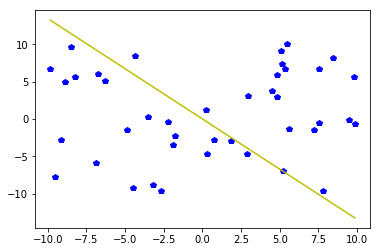

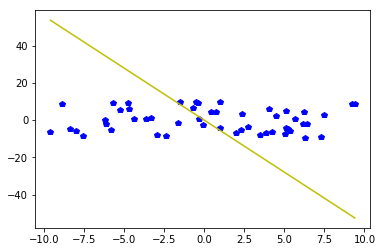

(array([ 7.27324609, -9.00749112]), 1.0)
number of step = 2


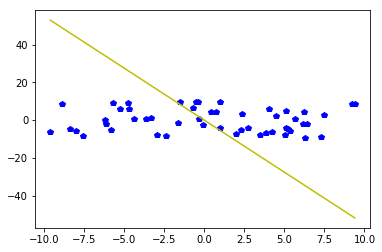

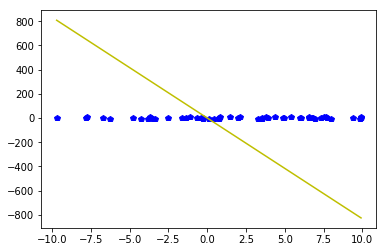

(array([ 0.76811408, -9.65227091]), 1.0)
number of step = 56


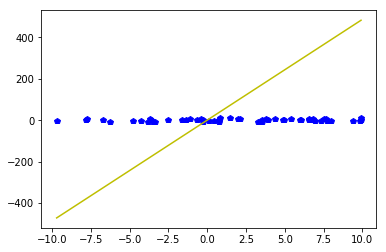

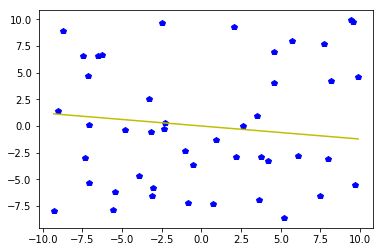

(array([-3.30574374,  2.52994942]), 1.0)
number of step = 20


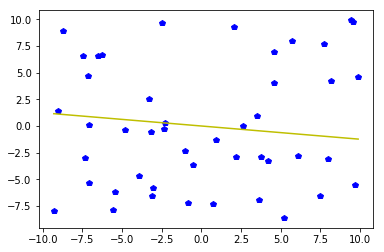

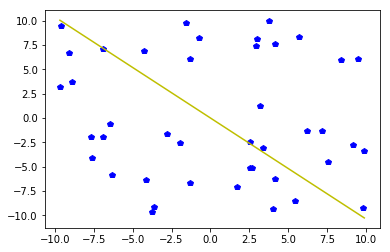

(array([-6.92798363,  7.06519439]), -1.0)
number of step = 5


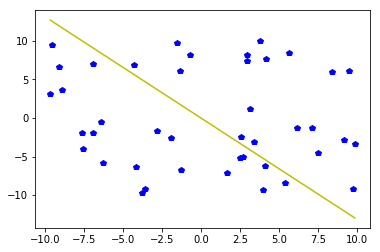

In [219]:
for i in range(10):
    p,n,w = CLS_data()
    df = np.vstack([p,n])
    plot(df,w)
    y=np.concatenate([np.ones(len(p)),-1*np.ones(len(n))])
    w2=PLA(df,y)
    plot(df,w2)

In [107]:
for i in range()

array([ 4.84568095,  4.64789806,  4.45011516,  4.25233227,  4.05454937,
        3.85676647,  3.65898358,  3.46120068,  3.26341779,  3.06563489,
        2.86785199,  2.6700691 ,  2.4722862 ,  2.2745033 ,  2.07672041,
        1.87893751,  1.68115462,  1.48337172,  1.28558882,  1.08780593,
        0.89002303,  0.69224014,  0.49445724,  0.29667434,  0.09889145,
       -0.09889145, -0.29667434, -0.49445724, -0.69224014, -0.89002303,
       -1.08780593, -1.28558882, -1.48337172, -1.68115462, -1.87893751,
       -2.07672041, -2.2745033 , -2.4722862 , -2.6700691 , -2.86785199,
       -3.06563489, -3.26341779, -3.46120068, -3.65898358, -3.85676647,
       -4.05454937, -4.25233227, -4.45011516, -4.64789806, -4.84568095])

In [192]:
w=np.ones((1,2))
w.reshape(w.shape[1])

array([1., 1.])

1.2565113017556033
-0.2041672328445152
-0.8101925851702756
8.804066368694045
5.453651729534501
-1.5604383039134628
-6.689012368344642
-1.8517539862805243
-8.66605000702014
0.17721743138780433
-3.569882261822775
6.177093063330666
-9.261552784131572
9.139853636451882
-2.4978386513695305
-5.120423527609999
-2.8849542792122023
-5.036196983563663
2.2018672700595943
6.14216947526084
8.453205906267428
-9.435546435756166
-9.018937987284314
9.669031353219047
-5.228016893560774
-8.105221882533717
-0.862536428631973
-8.360263179848573
-5.786677546022457
-8.824429362271434
8.844153969679294
-4.864409654775608
-5.611426627775133
-4.838826944811629
-1.2578312005990515
-4.433020848295213
0.1676692477256907
-6.094633672829868
-8.265665882512671
-9.025926182733206
7.046758978202451
-8.2431143858721
-7.3329669040982015
